## Packages

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, models, layers

In [38]:
import os

## Dataset: MNIST

In [39]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [40]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

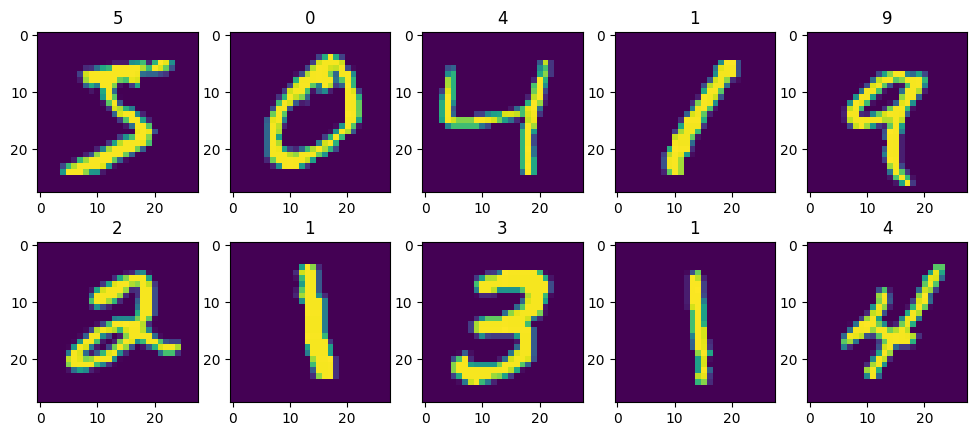

In [41]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train.reshape(-1,)[i])

<hr>

## Normalization: Min-Max

In [42]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

### Graphs: generic code

In [43]:
def Graphs(accu, loss, val_accu, val_loss, epochs):
    # Create a figure and axis object
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    # First Subplot: Accuracy
    ax1.plot(epochs, accu, 'y', label='Trainning Accuracy')
    ax1.plot(epochs, val_accu, 'r', label='Validation Accuracy')
    ax1.set_title('Accuracy Graph')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    # Second Subplot: Loss
    ax2.plot(epochs, loss, 'y', label='Trainning Loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
    ax2.set_title('Loss Graph')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    # Adjust Layout:
    plt.tight_layout()
    # Show figure:
    plt.show()

## Model Building

In [44]:
model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(6,6), activation='relu', input_shape=(28,28,1)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256, kernel_size=(4,4), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256, kernel_size=(4,4), activation='relu'),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=10, activation='softmax')    
])

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 117s 153ms/step - accuracy: 0.8587 - loss: 0.4368 - val_accuracy: 0.9812 - val_loss: 0.0667
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 119s 159ms/step - accuracy: 0.9830 - loss: 0.0600 - val_accuracy: 0.9857 - val_loss: 0.0575
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 155ms/step - accuracy: 0.9882 - loss: 0.0406 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 157ms/step - accuracy: 0.9905 - loss: 0.0338 - val_accuracy: 0.9883 - val_loss: 0.0423
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 120s 159ms/step - accuracy: 0.9919 - loss: 0.0290 - val_accuracy: 0.9890 - val_loss: 0.0376


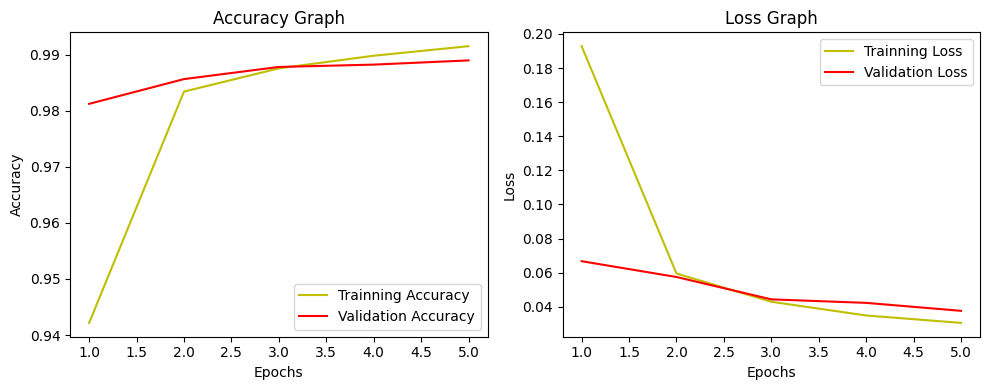

In [55]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

## Performance Evaluation: on Testing-set

In [48]:
loss, accu = model.evaluate(x_test, y_test)
print('Accuracy: ',accu*100,'%')
print('Loss: ',loss*100,"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9893 - loss: 0.0357
Accuracy:  99.1599977016449 %
Loss:  2.7918320149183273 %


#### Classification Report

In [49]:
proba = model.predict(x_test)
predi = [np.argmax(i) for i in proba]

print(classification_report(y_test,predi))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save Model

In [50]:
model.save('MNIST.h5')

## Handwritten Character Detection

In [51]:
model = models.load_model('MNIST.h5')

In [52]:
def CharDetection():
    path = str(input('Enter path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=1)
    plt.imshow(img)
    img  = tf.image.resize(img, [28,28])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: Object Detection
    probabilities = model.predict(img)
    max_index = np.argmax(probabilities)
    print(f"\u2022 Detected Character: {max_index}")

Enter path of Image:  2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
• Detected Character: 1


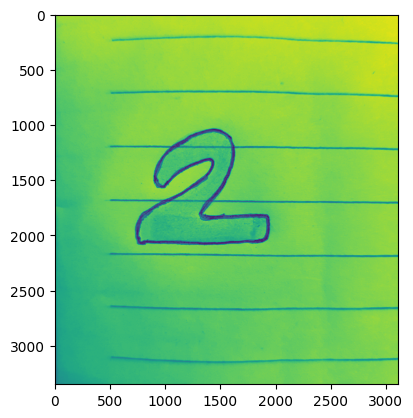

In [56]:
CharDetection()

Enter path of Image:  2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
• Detected Character: 1


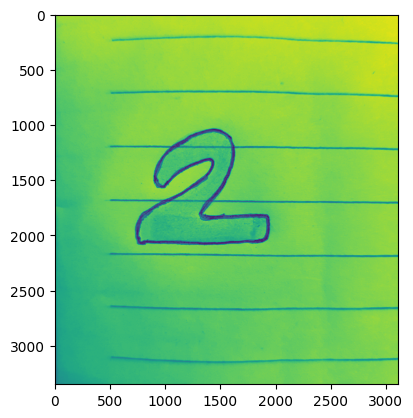

In [57]:
CharDetection()

<hr>